#### Generamos un subset de datos con todas las imágenes dicom que tengan 1 categoría influyendo las primeras 2500 No Finding

In [1]:
import os
import shutil
import pandas as pd

# Rutas a las carpetas y archivos CSV
csv_path = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/csv/4categories_with_image_names.csv'
source_images_dir = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/original/Vindrmammo/images'
destination_images_dir = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/subset_datos/4categories'

# Cargar el archivo CSV
filtered_df = pd.read_csv(csv_path)

# Eliminar duplicados basados en 'image_id', manteniendo solo la primera ocurrencia
filtered_unique_df = filtered_df.drop_duplicates(subset='image_id', keep='first')

# Función para copiar la imagen a la carpeta de destino manteniendo la estructura de directorios
def copy_image(image_id, study_id, source_dir, destination_dir):
    # Ruta de la imagen en el directorio original
    source_image_path = os.path.join(source_dir, study_id, image_id + '.dicom')
    
    # Crear la misma estructura de carpetas en el directorio de destino
    destination_study_dir = os.path.join(destination_dir, study_id)
    
    # Si no existe la carpeta de destino, crearla
    os.makedirs(destination_study_dir, exist_ok=True)
    
    # Ruta de la imagen en la carpeta de destino
    destination_image_path = os.path.join(destination_study_dir, image_id + '.dicom')
    
    # Copiar la imagen si no existe ya en la carpeta de destino
    if not os.path.exists(destination_image_path):
        shutil.copy2(source_image_path, destination_image_path)
        print(f"Imagen {image_id} copiada a {destination_image_path}")
    else:
        print(f"Imagen {image_id} ya existe en la carpeta de destino, omitiendo...")

# Recorrer las imágenes únicas y copiarlas a la carpeta de destino
for index, row in filtered_unique_df.iterrows():
    image_id = row['image_id']
    study_id = row['study_id']
    
    # Copiar la imagen a la carpeta de destino manteniendo la estructura
    copy_image(image_id, study_id, source_images_dir, destination_images_dir)

print("Proceso de copia completado.")


Imagen 20f086e205b027c23a7b027ec35b2044 copiada a /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/subset_datos/4categories/9b8f9aafae416f76b1dbc282196e9c9d/20f086e205b027c23a7b027ec35b2044.dicom
Imagen 1a957f72705abd0d90f1ae75418ccd2f copiada a /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/subset_datos/4categories/4943e0473ec09cba44b133786181191b/1a957f72705abd0d90f1ae75418ccd2f.dicom
Imagen 182416817adf847620e100ac6d850704 copiada a /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/subset_datos/4categories/c3af0a475602a02fb0ca5c067fc21e64/182416817adf847620e100ac6d850704.dicom
Imagen 12c944ae2e8bdee3f02af62347e61fa0 copiada a /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/subset_datos/4categories/532d340148f26bc7dd4085a29f8b26a3/12c944ae2e8bdee3f02af62347e61fa0.dicom
Imagen 1b3443d3eafe57a58e1b306fd21d4d4b copiada a /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/subset_datos

In [2]:
###Contamos cuantas imágenes quedaron

In [3]:
from pathlib import Path

# Ruta a la carpeta de destino donde se copiaron las imágenes DICOM
destination_images_dir = Path('/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/subset_datos/4categories')

# Verificar que la carpeta de destino existe
if not destination_images_dir.exists():
    print(f"La carpeta '{destination_images_dir}' no existe.")
    exit(1)

# Inicializar contador total y diccionario para conteo por subcarpeta
total_dicom_count = 0
dicom_counts_per_subdir = {}

# Recorrer cada subcarpeta (asumiendo que cada subcarpeta representa un study_id)
for subdir in destination_images_dir.iterdir():
    if subdir.is_dir():
        # Contar archivos .dicom en la subcarpeta
        dicom_files = list(subdir.rglob('*.dicom'))
        count = len(dicom_files)
        dicom_counts_per_subdir[subdir.name] = count
        total_dicom_count += count

# Imprimir el conteo por subcarpeta
for study_id, count in dicom_counts_per_subdir.items():
    print(f"Study ID: {study_id} - Imágenes DICOM: {count}")

print(f"\nTotal de imágenes DICOM en '{destination_images_dir}': {total_dicom_count}")


Study ID: 60c8177e1f4f489c8e14ad6804f8579a - Imágenes DICOM: 3
Study ID: b57a5a2715f6f07f9363e82a1732bd7c - Imágenes DICOM: 1
Study ID: 7c8c4b1c7ba2be573afb41c857118dc6 - Imágenes DICOM: 1
Study ID: 38d9a4124ecc9032f0e55da1a6322bf0 - Imágenes DICOM: 2
Study ID: e5e0f092ba767a07a4086c702d9cd329 - Imágenes DICOM: 1
Study ID: 7c3f108bd2ace00dfcdc25f3b43749e8 - Imágenes DICOM: 1
Study ID: f5c548e47e4ac764243e9b068b2d6e5e - Imágenes DICOM: 3
Study ID: e6b5b2ca5c32828c41806d4acf06ee08 - Imágenes DICOM: 1
Study ID: 8426923cb5a613bf95eeaa53f82ef09f - Imágenes DICOM: 1
Study ID: b5e4f282eed47db82fc0ec04dff01cc5 - Imágenes DICOM: 1
Study ID: 543d36c1e4f0957fddd46c3078f21c93 - Imágenes DICOM: 2
Study ID: 5e3216db19aa93c7e397e29a7ede3ea8 - Imágenes DICOM: 2
Study ID: f43b243ea95b66dfee3fecc66fcc2a8d - Imágenes DICOM: 3
Study ID: 08d8818f81810c7979df66dccf549932 - Imágenes DICOM: 2
Study ID: bf95ec398552e14a4a2aa68eb77bddc5 - Imágenes DICOM: 1
Study ID: a583bb3caddd4f6c7461e870c76f30fe - Imágenes D

#### Ahora las pasaremos a dicom y las guardaremos en sus rutas correspondientes. 

In [ ]:
import os
import pydicom
import numpy as np
import pandas as pd
import cv2
import re  # Importar 're' al inicio del script
from pydicom.pixel_data_handlers.util import apply_voi_lut

# ---------------------- Configuración de Rutas ---------------------- #

# Rutas a las carpetas y archivos CSV
csv_path = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/csv/4categories_with_image_names.csv'
source_images_dir = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/subset_datos/4categories'
output_root = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/subset_datos/4categories_PNG'

# Ruta para guardar el nuevo CSV
csv_output_path = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/csv/png_4categories.csv'

# ---------------------- Crear Estructura de Directorios ---------------------- #

def create_output_directories(output_root):
    # Categorías principales
    categories = ['masas', 'calcificaciones', 'otras_categorias', 'no_encontrado']
    
    # Subcategorías basadas en BIRADS para las primeras tres categorías
    birads_subcategories = {
        'benigno': ['BI-RADS 3'],
        'sospechoso': ['BI-RADS 4'],
        'maligno': ['BI-RADS 5']
    }

    # Crear directorios para 'masas' y 'calcificaciones' con subcategorías
    for category in ['masas', 'calcificaciones']:
        for subcategory, birads_list in birads_subcategories.items():
            path = os.path.join(output_root, category, subcategory)
            os.makedirs(path, exist_ok=True)
            print(f"Creada o verificada la carpeta: {path}")

    # Crear directorios para 'otras_categorias' con subcategorías
    for subcategory, birads_list in birads_subcategories.items():
        path = os.path.join(output_root, 'otras_categorias', subcategory)
        os.makedirs(path, exist_ok=True)
        print(f"Creada o verificada la carpeta: {path}")

    # Crear directorio para 'no_encontrado' sin subcategorías
    path = os.path.join(output_root, 'no_encontrado')
    os.makedirs(path, exist_ok=True)
    print(f"Creada o verificada la carpeta: {path}")

create_output_directories(output_root)

# ---------------------- Funciones de Procesamiento ---------------------- #

# Función para mapear BIRADS a subcategorías
def map_birads_to_subcategory(birads):
    if birads == 'BI-RADS 3':
        return 'benigno'
    elif birads == 'BI-RADS 4':
        return 'sospechoso'
    elif birads == 'BI-RADS 5':
        return 'maligno'
    else:
        print(f"Advertencia: BIRADS desconocido '{birads}'. Asignando a 'benigno'.")
        return 'benigno'

# Función para procesar y convertir DICOM a PNG
def dicom_to_png(dicom_path, image_name):
    try:
        dicom = pydicom.dcmread(dicom_path)
        original_image = dicom.pixel_array

        # Aplicar VOI LUT con prefer_lut=True (priorizando LUT si está presente)
        img_windowed = apply_voi_lut(original_image, dicom, prefer_lut=True)

        # Manejar Photometric Interpretation si es MONOCHROME1 (invertir la imagen)
        photometric_interpretation = dicom.get('PhotometricInterpretation', 'UNKNOWN')
        if photometric_interpretation == 'MONOCHROME1':
            img_windowed = img_windowed.max() - img_windowed
            print(f"Imagen '{image_name}' invertida debido a Photometric Interpretation: {photometric_interpretation}")
        else:
            print(f"Imagen '{image_name}' Photometric Interpretation: {photometric_interpretation}")

        # Normalizar la imagen para que esté en el rango [0, 255]
        img_normalized = (img_windowed - img_windowed.min()) / (img_windowed.max() - img_windowed.min()) * 255
        img_normalized = img_normalized.astype(np.uint8)

        # Redimensionar la imagen a 224x224 píxeles
        img_resized = cv2.resize(img_normalized, (224, 224), interpolation=cv2.INTER_AREA)

        return img_resized

    except Exception as e:
        print(f"Error al procesar {dicom_path}: {e}")
        return None

# Función para obtener la ruta del archivo DICOM usando image_id
def get_dicom_path(image_id, source_dir):
    # Posibles extensiones de archivo
    extensions = ['.dicom', '.dcm']
    for ext in extensions:
        dicom_filename = f"{image_id}{ext}"
        dicom_path = os.path.join(source_dir, dicom_filename)
        if os.path.exists(dicom_path):
            print(f"Encontrado DICOM para '{image_id}': {dicom_path}")
            return dicom_path
    # Si no se encuentra en la raíz, buscar en subdirectorios
    for root, dirs, files in os.walk(source_dir):
        for ext in extensions:
            dicom_filename = f"{image_id}{ext}"
            if dicom_filename in files:
                found_path = os.path.join(root, dicom_filename)
                print(f"Encontrado DICOM para '{image_id}' en subdirectorio: {found_path}")
                return found_path
    print(f"No se encontró el archivo DICOM para image_id: {image_id}")
    return None

# ---------------------- Procesamiento Principal ---------------------- #

def process_dicom_images(csv_path, source_dir, output_root, csv_output_path):
    # Leer el archivo CSV
    try:
        df = pd.read_csv(csv_path)
        print(f"CSV cargado correctamente con {len(df)} filas.")
    except Exception as e:
        print(f"Error al leer el CSV: {e}")
        return

    # Verificar columnas necesarias
    required_columns = ['image_id', 'image_name', 'finding_categories', 'finding_birads']
    for col in required_columns:
        if col not in df.columns:
            print(f"Error: La columna '{col}' no está presente en el CSV.")
            return

    # Limpiar los valores de 'finding_categories'
    df['finding_categories'] = df['finding_categories'].apply(lambda x: x.strip("[]'") if isinstance(x, str) else x)

    # Limpiar los valores de 'finding_birads' eliminando espacios adicionales
    df['finding_birads'] = df['finding_birads'].apply(lambda x: x.strip() if isinstance(x, str) else x)

    # Mostrar los valores únicos después de limpiar
    print("\nValores únicos en 'finding_categories' después de limpiar:")
    unique_categories = df['finding_categories'].unique()
    for category in unique_categories:
        print(f"- {category}")

    # Filtrar solo las categorías que contienen 'Mass', 'Suspicious Calcification' o las otras categorías específicas
    target_categories = [
        'Mass',
        'Suspicious Calcification',
        'focal asymmetry',
        'architectural distortion',
        'asymmetry',
        'suspicious lymph node',
        'skin thickening',
        'global asymmetry',
        'nipple retraction',
        'skin retraction',
        'No Finding'  # Agregado para incluir 'No Finding' en el filtrado
    ]

    # Crear una expresión regular para coincidir con las categorías objetivo
    regex_pattern = r'\b(?:' + '|'.join([re.escape(cat) for cat in target_categories]) + r')\b'

    df_filtered = df[df['finding_categories'].str.contains(regex_pattern, case=False, na=False)]
    filtered_count = len(df_filtered)
    print(f"\nFiltrado de categorías específicas: {filtered_count} de {len(df)} imágenes.")

    if filtered_count == 0:
        print("No hay imágenes para procesar después del filtrado.")
        return

    # Inicializar un diccionario para contar imágenes por categoría y subcategoría
    counts_dict = {
        'masas': {'benigno': 0, 'sospechoso': 0, 'maligno': 0},
        'calcificaciones': {'benigno': 0, 'sospechoso': 0, 'maligno': 0},
        'otras_categorias': {'benigno': 0, 'sospechoso': 0, 'maligno': 0},
        'no_encontrado': {'total': 0}
    }

    # Lista para almacenar las filas del nuevo CSV
    new_csv_data = []

    # Contador de imágenes procesadas y errores
    processed_images = 0
    failed_images = 0

    # Implementar una caché para almacenar dicom_path ya encontrados
    dicom_cache = {}

    # Recorrer cada fila del DataFrame filtrado
    for index, row in df_filtered.iterrows():
        image_id = row['image_id']
        image_name = row['image_name']
        finding_category = row['finding_categories']
        finding_birads = row['finding_birads']

        print(f"\nProcesando image_name: {image_name}, Categoría: {finding_category}, BIRADS: {finding_birads}")

        # Verificar si la categoría es 'No Finding'
        if finding_category.strip().lower() == 'no finding':
            category = 'no_encontrado'
            subcategory = None  # No aplica
            counts_dict[category]['total'] += 1

            # Definir la ruta de guardado
            output_dir = os.path.join(output_root, category)
            output_filename = f"{image_name}.png"
            output_path = os.path.join(output_dir, output_filename)

            # Obtener la ruta del archivo DICOM usando image_id
            if image_id in dicom_cache:
                dicom_path = dicom_cache[image_id]
                if dicom_path is None:
                    print(f"No se encontró previamente el DICOM para image_id: {image_id}. Saltando.")
                    failed_images += 1
                    continue
            else:
                dicom_path = get_dicom_path(image_id, source_dir)
                dicom_cache[image_id] = dicom_path

            if dicom_path is None:
                failed_images += 1
                continue  # Saltar si no se encontró el DICOM

            # Procesar la imagen DICOM y obtener la imagen normalizada y redimensionada
            img_png = dicom_to_png(dicom_path, image_name)
            if img_png is None:
                failed_images += 1
                continue  # Saltar si hubo un error en el procesamiento

            # Guardar la imagen como PNG
            try:
                cv2.imwrite(output_path, img_png)
                print(f"Imagen PNG guardada en: {output_path}")
                processed_images += 1
            except Exception as e:
                print(f"Error al guardar PNG para {image_name}: {e}")
                failed_images += 1
                continue

            # Agregar la información al nuevo CSV
            new_csv_data.append({
                'image_name': image_name,
                'finding_birads': finding_birads,
                'finding_categories': finding_category,
                'categoria': category,
                'subcategory': subcategory if subcategory else ''
            })

            continue  # Continuar con la siguiente iteración

        # Obtener la ruta del archivo DICOM usando image_id
        if image_id in dicom_cache:
            dicom_path = dicom_cache[image_id]
            if dicom_path is None:
                print(f"No se encontró previamente el DICOM para image_id: {image_id}. Saltando.")
                failed_images += 1
                continue
        else:
            dicom_path = get_dicom_path(image_id, source_dir)
            dicom_cache[image_id] = dicom_path

        if dicom_path is None:
            failed_images += 1
            continue  # Saltar si no se encontró el DICOM

        # Procesar la imagen DICOM y obtener la imagen normalizada y redimensionada
        img_png = dicom_to_png(dicom_path, image_name)
        if img_png is None:
            failed_images += 1
            continue  # Saltar si hubo un error en el procesamiento

        # Determinar la categoría y subcategoría
        category = None
        subcategory = None

        # Verificar a qué categoría pertenece la imagen
        category_found = False
        for target_cat in target_categories:
            if re.search(rf'\b{re.escape(target_cat)}\b', finding_category, re.IGNORECASE):
                if target_cat.lower() == 'mass':
                    category = 'masas'
                elif target_cat.lower() == 'suspicious calcification':
                    category = 'calcificaciones'
                else:
                    category = 'otras_categorias'
                category_found = True
                break

        if not category_found:
            print(f"Categoría desconocida '{finding_category}' para image_name {image_name}. Asignando a 'otras_categorias'.")
            category = 'otras_categorias'

        # Asignar subcategoría basado en BIRADS
        subcategory = map_birads_to_subcategory(finding_birads)

        # Incrementar el conteo correspondiente
        if category in counts_dict and subcategory in counts_dict[category]:
            counts_dict[category][subcategory] += 1
        else:
            # Si por alguna razón la categoría o subcategoría no existe en el diccionario
            print(f"Categoría o subcategoría no reconocida para image_name {image_name}.")
            failed_images += 1
            continue

        # Definir la ruta de guardado
        output_dir = os.path.join(output_root, category, subcategory)
        output_filename = f"{image_name}.png"
        output_path = os.path.join(output_dir, output_filename)

        # Guardar la imagen como PNG
        try:
            cv2.imwrite(output_path, img_png)
            print(f"Imagen PNG guardada en: {output_path}")
            processed_images += 1
        except Exception as e:
            print(f"Error al guardar PNG para {image_name}: {e}")
            failed_images += 1
            continue

        # Agregar la información al nuevo CSV
        new_csv_data.append({
            'image_name': image_name,
            'finding_birads': finding_birads,
            'finding_categories': finding_category,
            'categoria': category,
            'subcategory': subcategory
        })

    # Crear un DataFrame para el nuevo CSV
    new_csv_df = pd.DataFrame(new_csv_data)

    # Guardar el nuevo CSV
    try:
        new_csv_df.to_csv(csv_output_path, index=False)
        print(f"\nNuevo CSV guardado en: {csv_output_path}")
    except Exception as e:
        print(f"Error al guardar el nuevo CSV: {e}")

    # Mostrar los conteos
    print("\nCantidad de imágenes por categoría y subcategoría:")
    for category, subcats in counts_dict.items():
        if category != 'no_encontrado':
            for subcat, count in subcats.items():
                print(f"- {category.capitalize()} / {subcat.capitalize()}: {count}")
        else:
            print(f"- {category.capitalize()}: {subcats['total']}")
    total_processed = processed_images
    print(f"\nTotal de imágenes procesadas: {total_processed}")
    print(f"Total de imágenes fallidas: {failed_images}")

# ---------------------- Función de Procesamiento Manual ---------------------- #

def manual_process_single_image(image_id, image_name, source_dir, output_root, finding_category, finding_birads):
    dicom_path = get_dicom_path(image_id, source_dir)
    if dicom_path:
        img_png = dicom_to_png(dicom_path, image_name)
        if img_png is not None:
            # Definir la categoría y subcategoría según tus datos
            # Determinar la categoría
            if 'Mass' in finding_category or 'mass' in finding_category:
                category = 'masas'
            elif 'Suspicious Calcification' in finding_category or 'suspicious calcification' in finding_category:
                category = 'calcificaciones'
            elif finding_category.strip().lower() == 'no finding':
                category = 'no_encontrado'
            else:
                category = 'otras_categorias'

            # Asignar subcategoría basado en BIRADS
            if category != 'no_encontrado':
                subcategory = map_birads_to_subcategory(finding_birads)
                output_dir = os.path.join(output_root, category, subcategory)
            else:
                subcategory = None
                output_dir = os.path.join(output_root, category)

            output_filename = f"{image_name}.png"
            output_path = os.path.join(output_dir, output_filename)

            # Guardar la imagen como PNG
            try:
                cv2.imwrite(output_path, img_png)
                print(f"Imagen PNG guardada manualmente en: {output_path}")
            except Exception as e:
                print(f"Error al guardar PNG para {image_name}: {e}")
        else:
            print(f"No se pudo procesar la imagen DICOM para {image_name}.")
    else:
        print(f"No se encontró el archivo DICOM para image_id: {image_id}.")

# ---------------------- Ejecutar el Procesamiento ---------------------- #

if __name__ == "__main__":
    # Ejecutar el procesamiento principal
    process_dicom_images(csv_path, source_images_dir, output_root, csv_output_path)

    # Opcional: Ejecutar el procesamiento manual de una sola imagen para verificar
    # Descomenta las siguientes líneas y reemplaza los valores con los adecuados
    # manual_process_single_image(
    #     image_id='ffb94da823c87898c7ce19b197dc24c9',
    #     image_name='ffb94da823c87898c7ce19b197dc24c9_0',
    #     source_dir=source_images_dir,
    #     output_root=output_root,
    #     finding_category='Mass',
    #     finding_birads='BI-RADS 3'
    # )


### Ahora haremos data aumentation para balancear las 4 categorías y dejarlas en 2500 cada una.

Creada o verificada la carpeta balanceada: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/subset_datos/images_4categories_balanced/masas/benigno
Creada o verificada la carpeta balanceada: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/subset_datos/images_4categories_balanced/masas/sospechoso
Creada o verificada la carpeta balanceada: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/subset_datos/images_4categories_balanced/masas/maligno
Creada o verificada la carpeta balanceada: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/subset_datos/images_4categories_balanced/calcificaciones/benigno
Creada o verificada la carpeta balanceada: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/subset_datos/images_4categories_balanced/calcificaciones/sospechoso
Creada o verificada la carpeta balanceada: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/subset_datos/images_4

Balanceando masas / benigno:  47%|████▋     | 268/566 [00:00<00:00, 500.70it/s]


Generadas 268 imágenes aumentadas para masas / benigno.
Balanceando: 453 -> 834 imágenes. Necesitas generar 381 imágenes.


Balanceando masas / sospechoso:  84%|████████▍ | 381/453 [00:00<00:00, 611.41it/s]


Generadas 381 imágenes aumentadas para masas / sospechoso.
Balanceando: 104 -> 834 imágenes. Necesitas generar 730 imágenes.


Balanceando masas / maligno: 100%|██████████| 104/104 [00:00<00:00, 104.12it/s]


Generadas 730 imágenes aumentadas para masas / maligno.
Balanceando: 65 -> 834 imágenes. Necesitas generar 769 imágenes.


Balanceando calcificaciones / benigno: 100%|██████████| 65/65 [00:01<00:00, 62.23it/s]


Generadas 769 imágenes aumentadas para calcificaciones / benigno.
Balanceando: 284 -> 834 imágenes. Necesitas generar 550 imágenes.


Balanceando calcificaciones / sospechoso: 100%|██████████| 284/284 [00:00<00:00, 324.72it/s]


Generadas 550 imágenes aumentadas para calcificaciones / sospechoso.
Balanceando: 53 -> 834 imágenes. Necesitas generar 781 imágenes.


Balanceando calcificaciones / maligno: 100%|██████████| 53/53 [00:01<00:00, 45.52it/s]


Generadas 781 imágenes aumentadas para calcificaciones / maligno.
Balanceando: 364 -> 834 imágenes. Necesitas generar 470 imágenes.


Balanceando otras_categorias / benigno: 100%|██████████| 364/364 [00:00<00:00, 504.54it/s]


Generadas 470 imágenes aumentadas para otras_categorias / benigno.
Balanceando: 184 -> 834 imágenes. Necesitas generar 650 imágenes.


Balanceando otras_categorias / sospechoso: 100%|██████████| 184/184 [00:00<00:00, 230.22it/s]


Generadas 650 imágenes aumentadas para otras_categorias / sospechoso.
Balanceando: 7 -> 834 imágenes. Necesitas generar 827 imágenes.


Balanceando otras_categorias / maligno: 100%|██████████| 7/7 [00:01<00:00,  6.80it/s]


Generadas 827 imágenes aumentadas para otras_categorias / maligno.
Copiadas 2500 imágenes de 'no_encontrado' sin balancear.

Verificación de la distribución balanceada:
- Masas / Benigno: 834 imágenes.
- Masas / Sospechoso: 834 imágenes.
- Masas / Maligno: 834 imágenes.
- Calcificaciones / Benigno: 834 imágenes.
- Calcificaciones / Sospechoso: 834 imágenes.
- Calcificaciones / Maligno: 834 imágenes.
- Otras_categorias / Benigno: 834 imágenes.
- Otras_categorias / Sospechoso: 834 imágenes.
- Otras_categorias / Maligno: 834 imágenes.
- No_encontrado: 2500 imágenes (copiadas sin balancear).
Verificación completada.

CSV balanceado guardado en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/csv/balanced_4categories.csv

Total de imágenes balanceadas: 10006


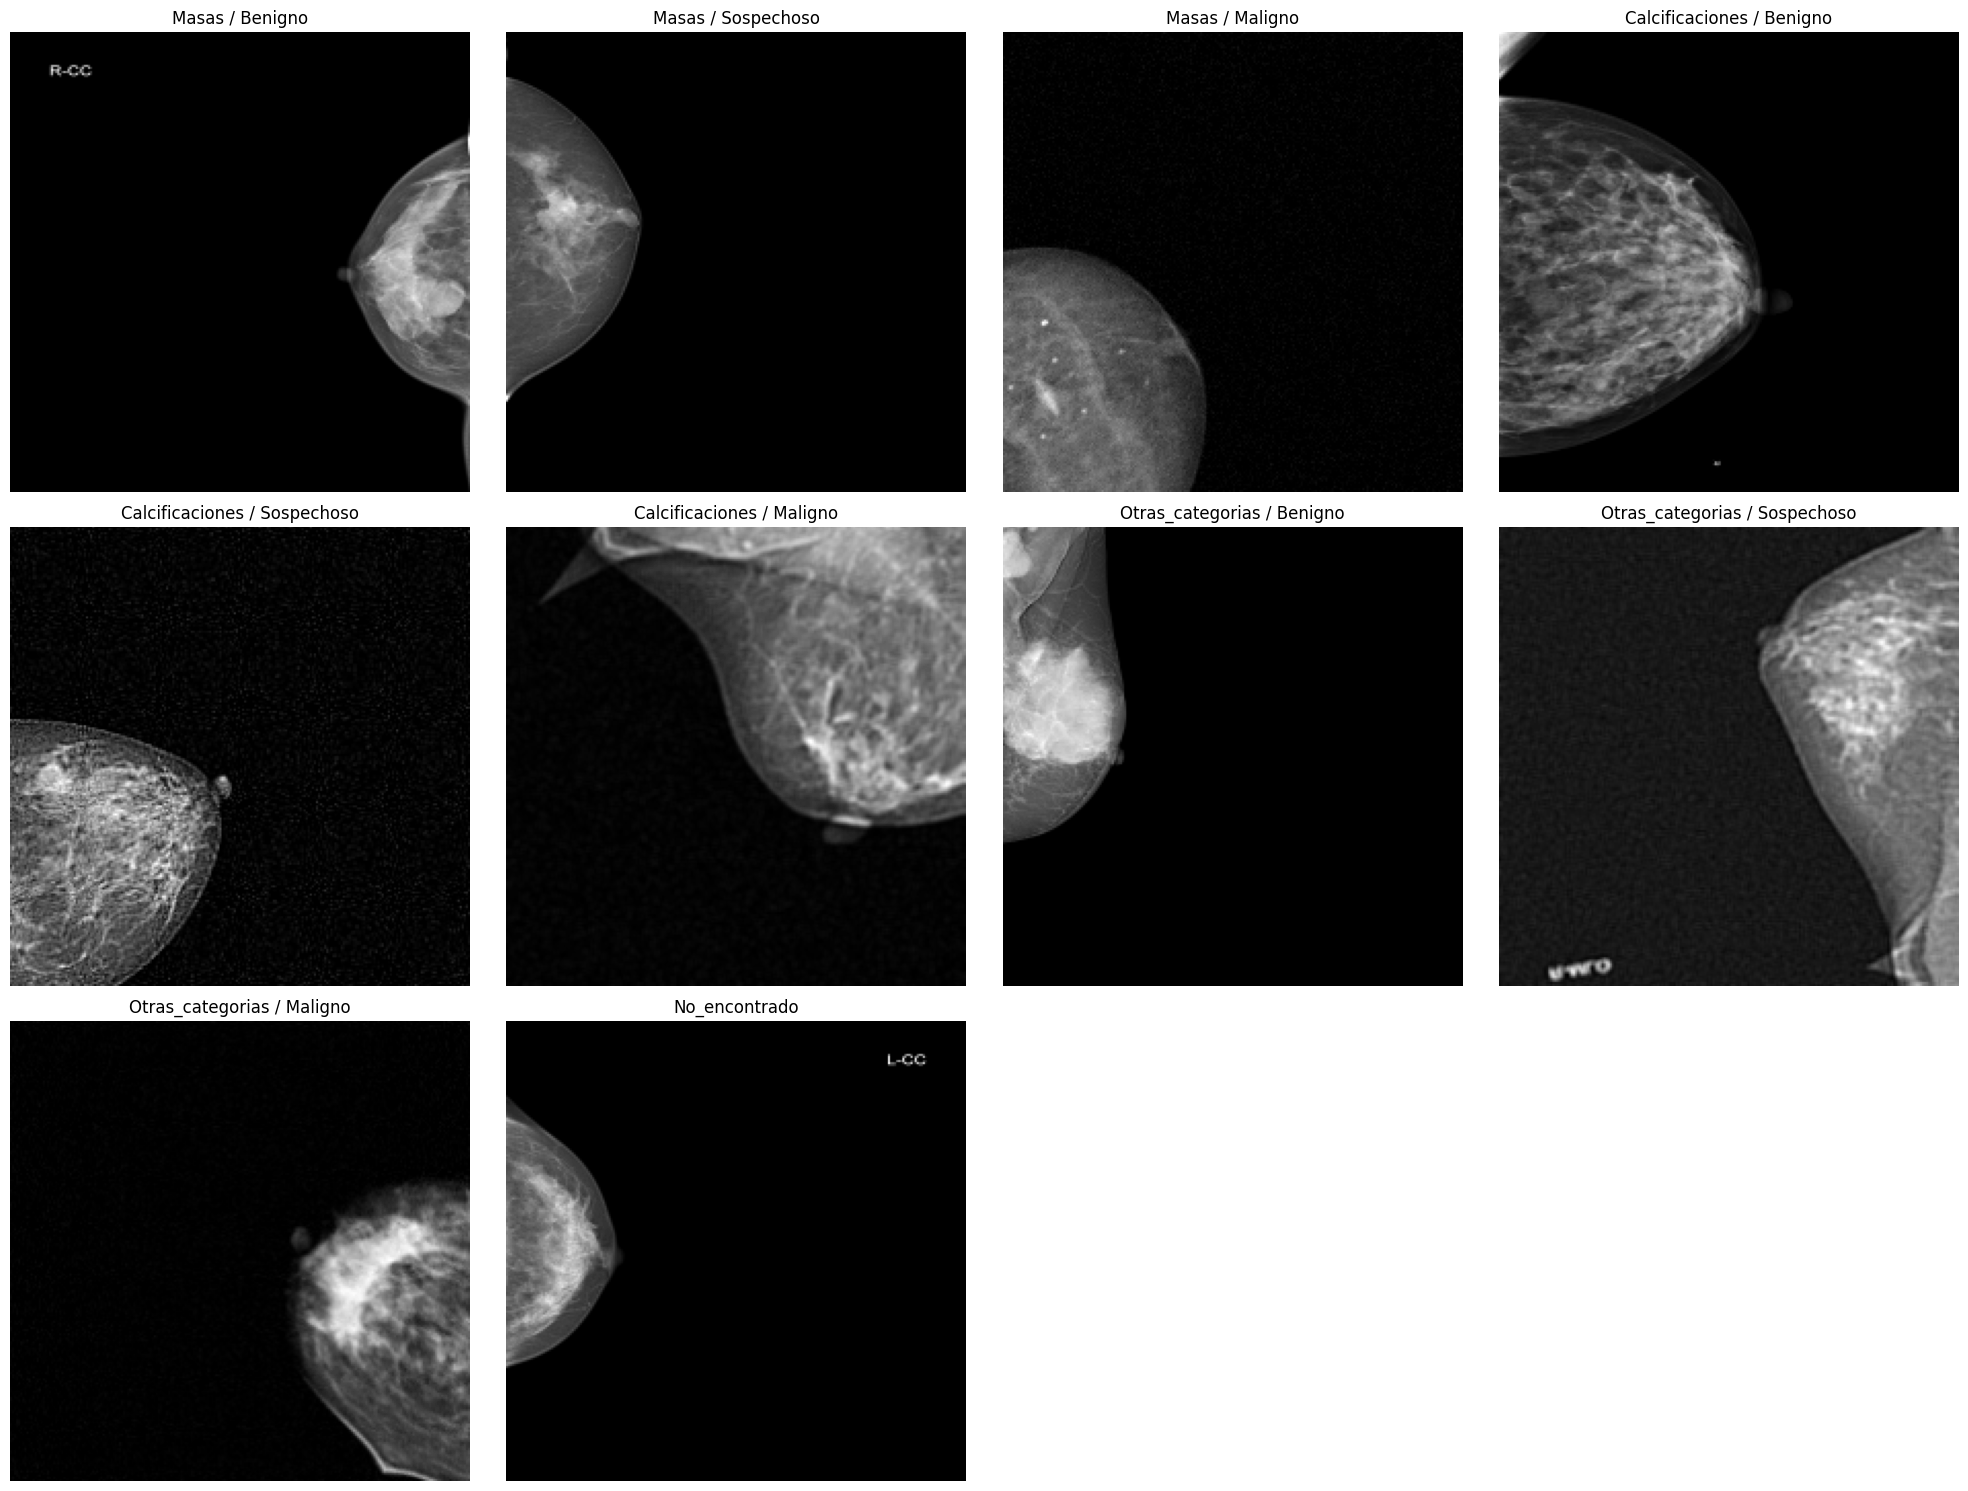

In [2]:
import os
import cv2
import albumentations as A
import numpy as np
from tqdm import tqdm
import shutil
import pandas as pd
import glob  # Para la búsqueda de archivos
import re  # Para expresiones regulares
import matplotlib.pyplot as plt

# ---------------------- Configuración de Rutas ---------------------- #

# Directorio de imágenes originales balanceadas
source_images_dir = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/subset_datos/4categories_PNG'

# Directorio de salida para imágenes balanceadas
balanced_output_root = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/subset_datos/images_4categories_balanced'

# Definir las categorías y subcategorías (sin subcategorías para 'no_encontrado')
categories = ['masas', 'calcificaciones', 'otras_categorias', 'no_encontrado']
subcategories = {
    'masas': ['benigno', 'sospechoso', 'maligno'],
    'calcificaciones': ['benigno', 'sospechoso', 'maligno'],
    'otras_categorias': ['benigno', 'sospechoso', 'maligno'],
    'no_encontrado': []  # Sin subcategorías
}

# Definir el número objetivo por categoría y subcategoría
TARGET_COUNT = 834  # 1,667 imágenes por subcategoría

# Ruta para guardar el CSV balanceado
csv_output_dir = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/csv'
csv_output_path = os.path.join(csv_output_dir, 'balanced_4categories.csv')


# ---------------------- Crear Estructura de Directorios Balanceados ---------------------- #

def create_balanced_directories(balanced_output_root, categories, subcategories):
    """
    Crea la estructura de directorios para almacenar las imágenes balanceadas.
    Para la categoría 'no_encontrado', no crea subdirectorios.
    """
    for category in categories:
        if subcategories[category]:  # Si hay subcategorías
            for subcategory in subcategories[category]:
                path = os.path.join(balanced_output_root, category, subcategory)
                os.makedirs(path, exist_ok=True)
                print(f"Creada o verificada la carpeta balanceada: {path}")
        else:  # Para 'no_encontrado', crear una sola carpeta sin subcategorías
            path = os.path.join(balanced_output_root, category)
            os.makedirs(path, exist_ok=True)
            print(f"Creada o verificada la carpeta balanceada: {path}")


create_balanced_directories(balanced_output_root, categories, subcategories)

# ---------------------- Definir Técnicas de Aumento de Datos ---------------------- #

# Definir el pipeline de aumento de datos
augmentation_pipeline = A.Compose([
    A.Rotate(limit=45, p=0.7),  # Rotación aleatoria hasta 45 grados
    A.HorizontalFlip(p=0.5),  # Volteo horizontal
    A.VerticalFlip(p=0.5),  # Volteo vertical
    A.RandomBrightnessContrast(p=0.7),  # Ajuste aleatorio de brillo y contraste
    A.GaussNoise(p=0.5),  # Añadir ruido gaussiano
    A.Sharpen(p=0.5),  # Aplicar filtro de enfoque
    A.RandomResizedCrop(height=224, width=224, scale=(0.8, 1.0), ratio=(0.9, 1.1), p=0.5),
    # Recorte aleatorio y redimensionado
    A.Blur(blur_limit=3, p=0.3),  # Aplicar desenfoque
    # Puedes agregar más transformaciones si lo deseas
])


# ---------------------- Función para Balancear una Subcategoría ---------------------- #

def balance_category_subcategory(category, subcategory, source_dir, target_dir, target_count, augmentation_pipeline):
    """
    Balancea una subcategoría específica aplicando técnicas de aumento de datos.
    Para 'no_encontrado', simplemente copia las imágenes sin balancear.
    
    Parameters:
    - category: Nombre de la categoría principal.
    - subcategory: Nombre de la subcategoría (puede ser vacío para 'no_encontrado').
    - source_dir: Directorio de las imágenes originales.
    - target_dir: Directorio donde se guardarán las imágenes balanceadas.
    - target_count: Número objetivo de imágenes por subcategoría.
    - augmentation_pipeline: Pipeline de aumentos a aplicar.
    """
    # Verificar si el directorio fuente existe
    if not os.path.exists(source_dir):
        print(f"Directorio fuente no existe: {source_dir}. Saltando balanceo.")
        return

    # Obtener la lista de imágenes en la subcategoría
    image_files = [f for f in os.listdir(source_dir) if f.lower().endswith('.png')]
    current_count = len(image_files)

    # Si la categoría es 'no_encontrado', simplemente copiar todas las imágenes sin balancear
    if category == 'no_encontrado':
        for image_file in image_files:
            src_path = os.path.join(source_dir, image_file)
            dst_path = os.path.join(target_dir, image_file)
            shutil.copy2(src_path, dst_path)
        print(f"Copiadas {current_count} imágenes de '{category}' sin balancear.")
        return

    # Copiar las imágenes existentes al directorio balanceado
    for image_file in image_files:
        src_path = os.path.join(source_dir, image_file)
        dst_path = os.path.join(target_dir, image_file)
        shutil.copy2(src_path, dst_path)

    # Calcular cuántas imágenes adicionales se necesitan
    needed = target_count - current_count
    if needed <= 0:
        print(f"No se necesita balancear. {current_count} >= {target_count}")
        return

    print(f"Balanceando: {current_count} -> {target_count} imágenes. Necesitas generar {needed} imágenes.")

    # Si no hay imágenes, no se puede realizar aumento
    if current_count == 0:
        print(f"No hay imágenes originales en {source_dir} para realizar aumento.")
        return

    # Calcular el número de aumentos por imagen
    augment_per_image = needed // current_count
    remainder = needed % current_count

    # Generar las imágenes aumentadas
    augmented_count = 0
    image_idx = 0

    for image_file in tqdm(image_files, desc=f"Balanceando {category} / {subcategory}"):
        if augmented_count >= needed:
            break

        src_path = os.path.join(source_dir, image_file)
        image = cv2.imread(src_path, cv2.IMREAD_GRAYSCALE)  # Asumiendo imágenes en escala de grises
        if image is None:
            print(f"Error al leer la imagen {src_path}. Saltando.")
            continue

        # Aplicar aumentos
        for i in range(augment_per_image):
            if augmented_count >= needed:
                break
            augmented = augmentation_pipeline(image=image)['image']
            # Generar un nombre único para la imagen aumentada
            base_name, ext = os.path.splitext(image_file)
            augmented_filename = f"{base_name}_aug_{i}.png"
            augmented_path = os.path.join(target_dir, augmented_filename)
            cv2.imwrite(augmented_path, augmented)
            augmented_count += 1

        # Manejar el remainder (si es necesario)
        if image_idx < remainder:
            augmented = augmentation_pipeline(image=image)['image']
            base_name, ext = os.path.splitext(image_file)
            augmented_filename = f"{base_name}_aug_extra.png"
            augmented_path = os.path.join(target_dir, augmented_filename)
            cv2.imwrite(augmented_path, augmented)
            augmented_count += 1

        image_idx += 1

    print(f"Generadas {augmented_count} imágenes aumentadas para {category} / {subcategory}.")


# ---------------------- Procesar Todas las Categorías y Subcategorías ---------------------- #

for category in categories:
    if subcategories[category]:  # Si hay subcategorías
        for subcategory in subcategories[category]:
            source_subdir = os.path.join(source_images_dir, category, subcategory)
            target_subdir = os.path.join(balanced_output_root, category, subcategory)
            balance_category_subcategory(category, subcategory, source_subdir, target_subdir, TARGET_COUNT,
                                         augmentation_pipeline)
    else:  # Para 'no_encontrado'
        source_subdir = os.path.join(source_images_dir, category)
        target_subdir = os.path.join(balanced_output_root, category)
        balance_category_subcategory(category, '', source_subdir, target_subdir, TARGET_COUNT, augmentation_pipeline)


# ---------------------- Verificación Final ---------------------- #

def verify_balanced_dataset(balanced_output_root, categories, subcategories, target_count):
    """
    Verifica que cada subcategoría en el conjunto de datos balanceado tenga el número objetivo de imágenes.
    Para 'no_encontrado', verifica simplemente que se hayan copiado las imágenes sin balancear.
    """
    print("\nVerificación de la distribución balanceada:")
    for category in categories:
        if subcategories[category]:
            for subcategory in subcategories[category]:
                target_subdir = os.path.join(balanced_output_root, category, subcategory)
                if not os.path.exists(target_subdir):
                    print(f"- {category.capitalize()} / {subcategory.capitalize()}: 0 imágenes (directorio no existe).")
                    continue
                image_files = [f for f in os.listdir(target_subdir) if f.lower().endswith('.png')]
                count = len(image_files)
                print(f"- {category.capitalize()} / {subcategory.capitalize()}: {count} imágenes.")
                if count != target_count:
                    print(
                        f"  -> Advertencia: {category} / {subcategory} tiene {count} imágenes, se esperaban {target_count}.")
        else:  # Para 'no_encontrado'
            target_subdir = os.path.join(balanced_output_root, category)
            image_files = [f for f in os.listdir(target_subdir) if f.lower().endswith('.png')]
            count = len(image_files)
            print(f"- {category.capitalize()}: {count} imágenes (copiadas sin balancear).")
    print("Verificación completada.")


verify_balanced_dataset(balanced_output_root, categories, subcategories, TARGET_COUNT)


# ---------------------- Generar CSV con las Imágenes Balanceadas ---------------------- #

def generate_balanced_csv(balanced_output_root, categories, subcategories, csv_output_path):
    """
    Genera un archivo CSV con la información de las imágenes balanceadas.
    
    Parameters:
    - balanced_output_root: Directorio raíz de las imágenes balanceadas.
    - categories: Lista de categorías principales.
    - subcategories: Diccionario de subcategorías por categoría.
    - csv_output_path: Ruta donde se guardará el CSV.
    """
    # Crear el directorio del CSV si no existe
    csv_dir = os.path.dirname(csv_output_path)
    os.makedirs(csv_dir, exist_ok=True)

    # Lista para almacenar las filas del CSV
    csv_data = []

    # Mapeo de categorías a finding_categories
    finding_categories_map = {
        'masas': 'Mass',
        'calcificaciones': 'Suspicious Calcification',
        'otras_categorias': 'Other',
        'no_encontrado': 'No Finding'  # Añadido para 'no_encontrado'
    }

    for category in categories:
        if subcategories[category]:
            for subcategory in subcategories[category]:
                target_subdir = os.path.join(balanced_output_root, category, subcategory)
                image_files = [f for f in os.listdir(target_subdir) if f.lower().endswith('.png')]
                for image_file in image_files:
                    image_name = os.path.splitext(image_file)[0]
                    finding_categories = finding_categories_map.get(category, 'Unknown')
                    category_label = subcategory  # 'benigno', 'sospechoso' o 'maligno'

                    csv_data.append({
                        'image_name': image_name,
                        'finding_categories': finding_categories,
                        'category': category_label
                    })
        else:  # Para 'no_encontrado'
            target_subdir = os.path.join(balanced_output_root, category)
            image_files = [f for f in os.listdir(target_subdir) if f.lower().endswith('.png')]
            for image_file in image_files:
                image_name = os.path.splitext(image_file)[0]
                finding_categories = finding_categories_map.get(category, 'Unknown')
                category_label = 'no_encontrado'  # O puedes dejarlo como 'No Finding'

                csv_data.append({
                    'image_name': image_name,
                    'finding_categories': finding_categories,
                    'category': category_label
                })

    # Crear un DataFrame y guardar como CSV
    df_csv = pd.DataFrame(csv_data)
    try:
        df_csv.to_csv(csv_output_path, index=False)
        print(f"\nCSV balanceado guardado en: {csv_output_path}")
    except Exception as e:
        print(f"Error al guardar el CSV: {e}")


generate_balanced_csv(balanced_output_root, categories, subcategories, csv_output_path)


# ---------------------- Resultado Final ---------------------- #

# Contar el total de imágenes balanceadas
def count_total_images(balanced_output_root, categories, subcategories):
    total = 0
    for category in categories:
        if subcategories[category]:
            for subcategory in subcategories[category]:
                target_subdir = os.path.join(balanced_output_root, category, subcategory)
                if not os.path.exists(target_subdir):
                    continue
                image_files = [f for f in os.listdir(target_subdir) if f.lower().endswith('.png')]
                total += len(image_files)
        else:  # Para 'no_encontrado'
            target_subdir = os.path.join(balanced_output_root, category)
            if not os.path.exists(target_subdir):
                continue
            image_files = [f for f in os.listdir(target_subdir) if f.lower().endswith('.png')]
            total += len(image_files)
    print(f"\nTotal de imágenes balanceadas: {total}")


count_total_images(balanced_output_root, categories, subcategories)


### Visualizamos

# ---------------------- Función para Seleccionar una Imagen ---------------------- #

def select_one_image(category, subcategory):
    """
    Selecciona la primera imagen PNG encontrada en la carpeta especificada.
    """
    # Construir la ruta de la subcategoría
    if subcategory:
        subcategory_path = os.path.join(output_root, category, subcategory)
    else:
        subcategory_path = os.path.join(output_root, category)

    # Buscar archivos PNG en la carpeta
    png_files = glob.glob(os.path.join(subcategory_path, '*.png'))

    if png_files:
        return png_files[0]  # Retorna la primera imagen encontrada
    else:
        print(f"No se encontraron imágenes en {subcategory_path}")
        return None


# ---------------------- Función para Invertir Imágenes si es Necesario ---------------------- #

def invert_image_if_needed(image):
    """
    Invierte la imagen si el fondo es predominantemente blanco.

    Parameters:
    - image (numpy.ndarray): Imagen en escala de grises.

    Returns:
    - numpy.ndarray: Imagen invertida si el fondo es blanco, de lo contrario la imagen original.
    """
    # Calcular el porcentaje de píxeles blancos
    white_pixels = np.sum(image > 200)
    total_pixels = image.size
    white_percentage = (white_pixels / total_pixels) * 100

    # Si más del 50% de los píxeles son blancos, invertir la imagen
    if white_percentage > 50:
        print("Invirtiendo la imagen para corregir el fondo.")
        return 255 - image
    else:
        return image


# ---------------------- Visualización de Imágenes ---------------------- #

def visualize_images(categories):
    """
    Visualiza una imagen de cada combinación de categoría y subcategoría.
    """
    # Calcular el número total de subcategorías para la cuadrícula
    total_images = sum(len(subcats) if subcats else 1 for subcats in categories.values())

    # Configurar la figura de Matplotlib
    cols = 4  # Número de columnas en la cuadrícula
    rows = (total_images + cols - 1) // cols  # Calcular el número de filas necesarias

    plt.figure(figsize=(20, 5 * rows))  # Ajustar el tamaño según el número de filas

    img_count = 1  # Contador de imágenes

    for category, subcats in categories.items():
        if subcats:
            for subcategory in subcats:
                img_path = select_one_image(category, subcategory)
                if img_path:
                    # Leer la imagen usando OpenCV
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    if img is None:
                        print(f"Error al leer la imagen: {img_path}")
                        continue

                    # Invertir la imagen si es necesario
                    img = invert_image_if_needed(img)

                    # Mostrar la imagen en la cuadrícula
                    plt.subplot(rows, cols, img_count)
                    plt.imshow(img, cmap='gray')
                    plt.title(f"{category.capitalize()} / {subcategory.capitalize()}")
                    plt.axis('off')  # Ocultar los ejes
                    img_count += 1
        else:  # Para 'no_encontrado'
            img_path = select_one_image(category, None)
            if img_path:
                # Leer la imagen usando OpenCV
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    print(f"Error al leer la imagen: {img_path}")
                    continue

                # Invertir la imagen si es necesario
                img = invert_image_if_needed(img)

                # Mostrar la imagen en la cuadrícula
                plt.subplot(rows, cols, img_count)
                plt.imshow(img, cmap='gray')
                plt.title(f"{category.capitalize()}")
                plt.axis('off')  # Ocultar los ejes
                img_count += 1

    plt.tight_layout()
    plt.show()


# ---------------------- Ejecutar la Visualización ---------------------- #

if __name__ == "__main__":
    # Ruta a la carpeta raíz donde se almacenan las imágenes PNG balanceadas
    output_root = balanced_output_root

    # Categorías y subcategorías para visualización
    categories_visual = {
        'masas': ['benigno', 'sospechoso', 'maligno'],
        'calcificaciones': ['benigno', 'sospechoso', 'maligno'],
        'otras_categorias': ['benigno', 'sospechoso', 'maligno'],
        'no_encontrado': []  # Sin subcategorías
    }

    visualize_images(categories_visual)

